## Task 1
Pipeline that constructs training data based on latitude-longitude coordinates.

- Downloads Open Street Maps files.
- Creates map projections of the contained buildings.
- Downloads satellite images from a Sentinel 2 data provider.

In [2]:
import os

from sentinelhub import (
    CRS,
    BBox,
    bbox_to_dimensions,
    SHConfig,
)
from dotenv import load_dotenv
import imageio
import matplotlib.pyplot as plt

import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from src.data_acquisition.sentinel_hub_image_downloader import SentinelHubImageDownloader
from src.data_acquisition.constants import EVALSCRIPTS

In [2]:
config = SHConfig()

load_dotenv('.env.local') 

config.sh_client_id = os.getenv("SH_CLIENT_ID")
config.sh_client_secret = os.getenv("SH_CLIENT_SECRET")

if not config.sh_client_id or not config.sh_client_secret:
    print("Warning! To use Process API, please provide the credentials (OAuth client ID and client secret).")

#### Download and save images from Sentinel Hub API
Download them in RGB, IRB and Grayscale.
For doing so, we have to specify the following parameters:
- Coordinates
- Resolution
- Start and end dates
- Evalscript

We wrap up these API parameters up in our class _SentinelHubImageDownloader_.

In [3]:
# Parameters
coordinates = (13.294333, 52.454927, 13.500205, 52.574409)
resolution = 10
start_date = "2024-04-17"
end_date = "2024-05-17"
evalscripts = EVALSCRIPTS

In [4]:
bbox = BBox(bbox=coordinates, crs=CRS.WGS84)
size = bbox_to_dimensions(bbox, resolution=resolution)

print(f"Image shape at {resolution} m resolution: width = {size[0]} px, height = {size[1]} px")

Image shape at 10 m resolution: width = 1426 px, height = 1298 px


In [5]:
downloader = SentinelHubImageDownloader(bbox, size, config, max_cloud_coverage=5)

In [6]:
downloader.time_interval = (start_date, end_date)

RGB image saved as 2024-04-17_2024-05-17_10m_RGB.png, showing image...


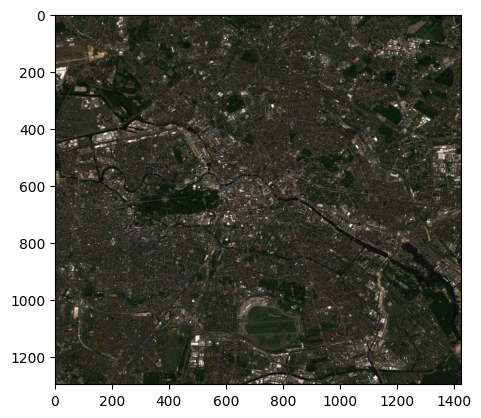

IRB image saved as 2024-04-17_2024-05-17_10m_IRB.png, showing image...


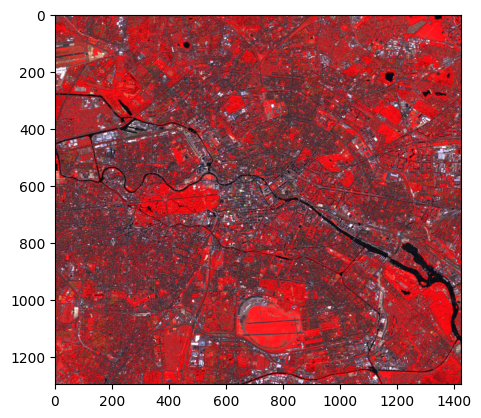

GRAY image saved as 2024-04-17_2024-05-17_10m_GRAY.png, showing image...


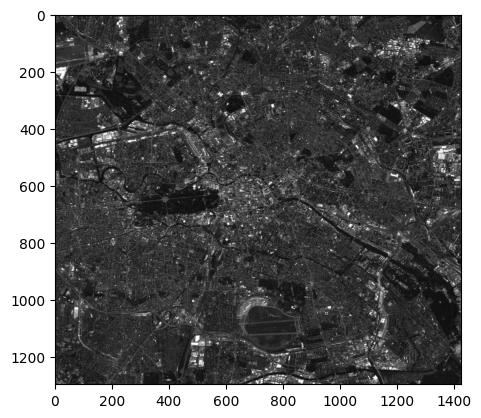

In [12]:
for evalscript_id, evalscript in evalscripts.items():
    downloader.evalscript = evalscript
    image_data = downloader.download_image()
    image_data = image_data[0]
    image_name = f'{start_date}_{end_date}_{resolution}m_{evalscript_id}.png'
    imageio.imsave(image_name, image_data)
    print(f'{evalscript_id} image saved as {image_name}, showing image...')
    if evalscript_id == 'GRAY':
        plt.imshow(image_data, cmap='gray')
    else:
        plt.imshow(image_data)
    plt.show()